import os
os.chdir(os.path.dirname(os.getcwd()))

In [1]:
from Map import Map
from Tabu import Tabu
from TwoStage import TwoStage
from L_shaped import MasterProblem as mp
import matplotlib.pyplot as plt
import matplotlib.pylab as pl 
import matplotlib.cm as cm
import time
import networkx as nx
import matplotlib as mpl

**Modelling Parameters**

In [2]:
rides = 5
bus = 1
scenarios = 25
MIPGap = 0.001
probability = [0.7, 0.1, 0.15, 0.05]

**Defining the Map**

In [3]:
mappy = Map(rides)

def Mod3():
    t3 = time.time()
    lshaped = mp(
        mappy,
        bus=bus,
        scenarios=scenarios,
#         probability=probability
    )
    lshaped.initialize()
    lshaped.model.params.MIPGap = MIPGap
    lshaped.optimize()
    t3 = time.time() - t3
    return lshaped, t3

**Plotting Functions**

In [4]:
def plot_trend(ub,lb,base):
    x = list(range(len(ub)))
    figure = plt.figure()
    plt.plot(x,ub,label='upper-bound')
    plt.plot(x,[base]*len(ub),label='two-stage')
    plt.plot(x,lb,label='lower-bound')
    plt.annotate(int(ub[-1]),[x[-1],ub[-1]])
    plt.legend()
    plt.savefig('./figures/trend.png')
    plt.show()

colors = ['green','blue','yellow','red','pink'] 
def displaygraph(n, e, modname):
    for k in e.keys():
        for i, j in e[k]:
            plt.plot((n[i][0],n[j][0]),(n[i][1],n[j][1]), color=colors[k] ,marker='o', linewidth=2, linestyle='dashed')
    for i in n:
        plt.annotate(i,n[i],textcoords="offset points",xytext=(0,10),ha='center')
    plt.savefig('./figures/'+modname+'.png')
    plt.show()


In [5]:
lshaped = mp(mappy, bus=bus, scenarios=scenarios)
lshaped.initialize()
lshaped.optimize()

Using license file C:\Users\Lavkesh\gurobi.lic
Academic license - for non-commercial use only
Changed value of parameter lazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter NodefileStart to 0.5
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Presolve to 2
   Prev: -1  Min: -1  Max: 2  Default: -1
Changed value of parameter MIPFocus to 2
   Prev: 0  Min: 0  Max: 3  Default: 0
Parameter Heuristics unchanged
   Value: 0.05  Min: 0.0  Max: 1.0  Default: 0.05
-58.313428221985305 -6.040798499823041
52.075320635985605 -0.19730908617665932
-52.73955156565407 -4.727171890136998
47.81507058934103 -0.19730908617603404
-68.58399023126003 -7.071683999999997
61.45022678843224 -0.06207944282779465
-67.12290467449202 -6.950642708863053
60.17222368372891 -3.8281900060610496e-05
-47.02062002277853 -3.084969602981456
49.56772444063027 5.632074020833201
-47.85391560333773 -3.640162455111207
49.84816099280321 5.634407844576685
-42.68741912274255 

     0     0   41.51656    0   35  184.47801   41.51656  77.5%     -    1s
     0     0   41.52622    0   25  184.47801   41.52622  77.5%     -    2s
     0     0   41.52622    0   25  184.47801   41.52622  77.5%     -    2s
     0     0   41.52915    0   24  184.47801   41.52915  77.5%     -    2s
     0     0   41.53508    0   25  184.47801   41.53508  77.5%     -    2s
     0     0   41.53516    0   25  184.47801   41.53516  77.5%     -    2s
     0     0   41.58013    0   24  184.47801   41.58013  77.5%     -    2s
     0     0   41.59513    0   29  184.47801   41.59513  77.5%     -    2s
     0     0   41.59816    0   28  184.47801   41.59816  77.5%     -    2s
     0     0   41.61156    0   29  184.47801   41.61156  77.4%     -    2s
     0     0   41.61261    0   28  184.47801   41.61261  77.4%     -    2s
     0     0   41.61261    0   28  184.47801   41.61261  77.4%     -    2s
     0     0   41.61261    0   25  184.47801   41.61261  77.4%     -    2s
     0     0   41.61261  

for model in lshaped.submodel.values():
    print(model.relaxmod.status)
lshaped.submodel[1].relaxmod.computeIIS()
lshaped.submodel[1].relaxmod.write('./Reports/IIS/Infeasible.ilp')

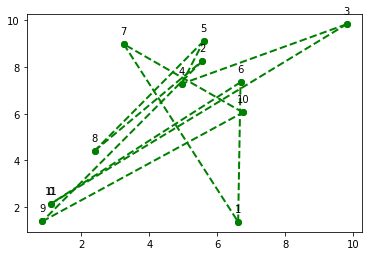

({0: (1.1023766955126613, 2.149994465566396),
  1: (6.616803941152992, 1.369965058751973),
  2: (5.562713035982458, 8.251613355022153),
  3: (9.809616817944004, 9.817322002150725),
  4: (4.952615053017678, 7.26958531517521),
  5: (5.605527294077216, 9.105998231022438),
  6: (6.686594697153306, 7.339300052329447),
  7: (3.246066736811871, 8.96796990397719),
  8: (2.3904454723582322, 4.411359608794717),
  9: (0.843757637929371, 1.389276175505827),
  10: (6.759363404020994, 6.048752438105499),
  11: (1.1023766955126613, 2.149994465566396)},
 {0: [(1, 6),
   (5, 8),
   (10, 7),
   (8, 2),
   (4, 5),
   (7, 1),
   (6, 0),
   (3, 4),
   (0, 3),
   (2, 9),
   (9, 10)]},
 [1, 2, 3, 4, 5])

In [6]:
nodes = mappy.node
edges = {k:[] for k in range(lshaped.bus)}
for i, j in lshaped.parameters.edges:
    for k in range(lshaped.bus):
        if lshaped.variables.x[i,j,k].X > 0.5:
            if j != lshaped.last:
                edges[k].append((i,j))
            else:
                edges[k].append((i,0))
bounds = lshaped.getcancel()
objlshaped = lshaped.model.ObjVal
displaygraph(nodes, edges,'L-Shaped')
nodes,edges,bounds

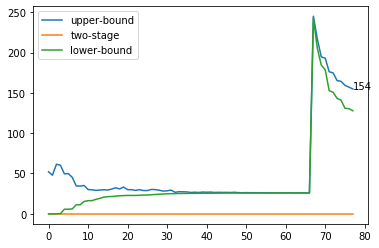

In [7]:
plot_trend(lshaped.upperbounds[1:],lshaped.lowerbounds[1:],0)

In [8]:
lshaped.printsol(lshaped.submodel)

Routing for bus 1
+---------+------+-------------+---------------+
| Pick-up | Drop | Pickup time | Drop-off time |
+---------+------+-------------+---------------+
|    1    |  6   |    13:21    |     13:49     |
+---------+------+-------------+---------------+
|    5    |  8   |    9:16     |     9:44      |
+---------+------+-------------+---------------+
|   10    |  7   |    12:22    |     12:47     |
+---------+------+-------------+---------------+
|    8    |  2   |    9:44     |     10:09     |
+---------+------+-------------+---------------+
|    4    |  5   |    9:00     |     9:16      |
+---------+------+-------------+---------------+
|    7    |  1   |    12:47    |     13:21     |
+---------+------+-------------+---------------+
|    6    |  11  |    13:49    |     14:23     |
+---------+------+-------------+---------------+
|    3    |  4   |    8:35     |     9:00      |
+---------+------+-------------+---------------+
|    0    |  3   |    7:59     |     8:35      |
+-

In [9]:
(sum(lshaped.variables.h[i,j].X for i,j in lshaped.variables.h.keys()),
sum(lshaped.variables.p_l[j].X for j in lshaped.variables.p_l.keys()))

(64.35137328761607, 3.197989632795043)

In [10]:
lshaped.submodel[3].sim.alpha

{0: 1, 11: 1, 1: 1, 6: 1, 2: 0, 7: 0, 3: 1, 8: 1, 4: 1, 9: 1, 5: 1, 10: 1}